In [27]:
# packs
import os
import fnmatch
import numpy as np
import pandas as pd
from google.cloud import bigquery
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager

#funciones
def consulta_archivo(patron, ruta='../querys'):
    """
    Ejecuta una consulta en BigQuery utilizando un archivo SQL que coincide con un patrón.

    Parameters:
    - patron (str): El patrón para buscar el archivo SQL.
    - ruta (str, optional): La ruta del directorio donde se buscarán los archivos SQL. 
                           Por defecto, es '../querys'.

    Returns:
    - pandas.DataFrame or None: El resultado de la consulta en forma de DataFrame de pandas. 
                               Si no se encuentra el archivo SQL, retorna None.

    Example:
    ```python
    patron_busqueda = 'megabrands'
    df_resultado = consulta_archivo(patron_busqueda)
    ```

    """
    # Encuentra el archivo SQL utilizando el patrón
    for nombre_archivo in os.listdir(ruta):
        if fnmatch.fnmatch(nombre_archivo, f'*{patron}*.sql'):
            # Construye la ruta completa al archivo SQL
            ruta_completa_sql = os.path.join(ruta, nombre_archivo)
            print(nombre_archivo)
            # Lee el contenido del archivo SQL
            with open(ruta_completa_sql, "r") as file:
                sql = file.read()

            # Ejecuta la consulta y convierte los resultados a un DataFrame de pandas
            cliente = bigquery.Client()
            df_resultado = cliente.query(sql).to_dataframe()
            print(df_resultado.shape)
            print(df_resultado.head(2))
            return df_resultado

    # Si no se encuentra ningún archivo que coincida con el patrón
    print('No se encontró el archivo SQL.')
    return None


def plot_percentiles(df, column_name, percentile_limit=100, value_name_x = 'Value', value_name_y= 'Value_2'):
    """
    Crea un histograma con líneas punteadas para los percentiles 33.33% y 66.67%.

    Parameters:
    - df (pandas.DataFrame): El DataFrame que contiene la columna de interés.
    - column_name (str): El nombre de la columna para la cual se calcularán los percentiles y se creará el histograma.
    - percentile_limit (float, optional): El percentil límite para filtrar los valores del DataFrame. Por defecto, es 100.

    Returns:
    - None: Muestra el histograma con las líneas punteadas.

    Example:
    ```python
    plot_percentiles(df, 'last_interaction_days', 100)
    ```

    """
    # Calcula el percentil límite
    percentile_value = np.percentile(df[column_name], percentile_limit)


    # Crea el subset excluyendo los valores superiores al percentil límite
    df_subset = df[df[column_name] <= percentile_value]

    # Calcula el histograma
    hist, bins = np.histogram(df_subset[column_name], bins=40)

    # Calcula percentiles
    percentiles = np.percentile(df_subset[column_name], [33.33, 66.67])
    print(percentiles)

    # Crea el histograma
    plt.hist(df_subset[column_name], bins=20, edgecolor='black', color=(255/255, 192/255, 0))
    plt.axvline(percentiles[0], color='black', linestyle='dashed', linewidth=2, label='33% Percentile')
    plt.axvline(percentiles[1], color='black', linestyle='dashed', linewidth=2, label='66% Percentile')

    # Añade etiquetas y título
    plt.xlabel(value_name_x)
    plt.ylabel(value_name_y)
    plt.title(f'Histogram & Percentiles')
    plt.legend()

    # Muestra el histograma
    plt.show()

# Ejemplo de uso con un DataFrame y una columna cualquiera
# plot_percentiles(df, 'tu_columna', 99)

# Llama a la función con el nombre de tu archivo SQL
# df_L2 = consulta_archivo('total')
# plot_percentiles(df_L2, 'last_interaction_days')



In [28]:
# Llama a la función con el nombre de tu archivo SQL
df_L1 = consulta_archivo('nes_pok')
# plot_percentiles(df_L1, 'Dias_interaccion')
print(df_L1[df_L1['nInteracciones'] == 0].shape)

interacciones_poker.sql
(488284, 4)
                                              td_id1  nInteracciones  \
0               bb165ea8-1297-477e-88f2-3de494eaccd0               1   
1  b7c4f1ff92be86aa17d06ecd622a808c302821ff4122a5...               1   

   Dias_interaccion abi_brand  
0               189     Poker  
1               189     Poker  
(82026, 4)


[112.0 154.0]


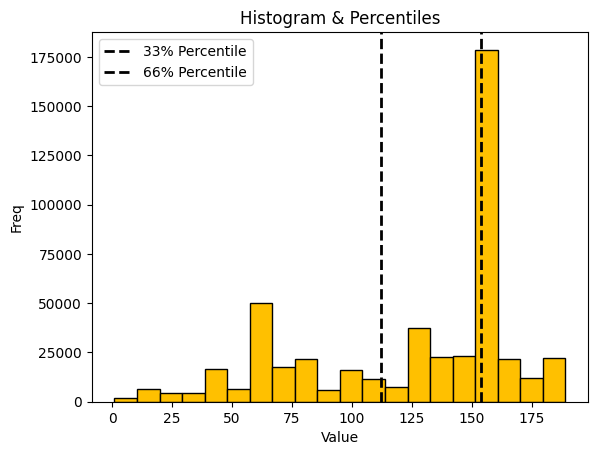

In [12]:
plot_percentiles(df_L1, 'Dias_interaccion')

In [29]:
percentile_value_max = np.percentile(df_L1['nInteracciones'], 98)
df = df_L1[(df_L1['nInteracciones'] > 0) & (df_L1['nInteracciones'] < percentile_value_max)].copy()
print(df.shape)
percentile_value_max = np.percentile(df['nInteracciones'], 66)
print(df[df['nInteracciones'] > percentile_value_max].shape)
# Crear un nuevo DataFrame con valores menores o iguales a 1
menores1 = df[df['nInteracciones'] <= 1].copy()
print(menores1.shape)
# Excluir los valores menores o iguales a 1 del DataFrame original
df_final = df[df['nInteracciones'] > 1].copy()
print(df_final.shape)

(396048, 4)
(113887, 4)
(282161, 4)
(113887, 4)


[2.0 4.0]


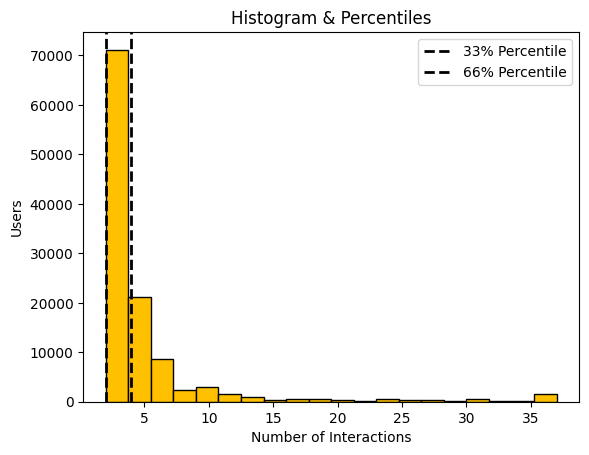

In [26]:
plot_percentiles(df_final, 'nInteracciones', value_name_x='Number of Interactions', value_name_y='Users')

[77.0 130.0]


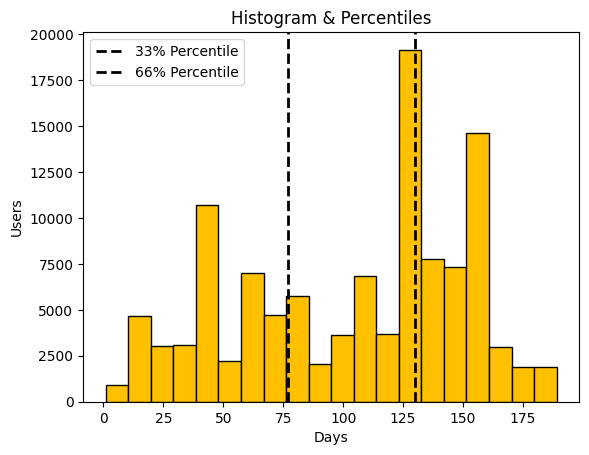

In [31]:
plot_percentiles(df_final, 'Dias_interaccion', value_name_x='Days', value_name_y='Users')

In [ ]:
 # Calcula el percentil límite
# percentile_value = 
# np.percentile(df_final['nInteracciones'], 66)
# print(percentile_value)
# percentile_value_max = np.percentile(df_final['nInteracciones'], 66)
# print(df_final[df_final['nInteracciones'] > percentile_value_max].shape)
#  # Calcula el percentil límite
# percentile_value = np.percentile(df_L1['nInteracciones'], 95)
# print(percentile_value)

In [32]:
df[df['nInteracciones'] <= 2].shape

(330616, 4)

In [33]:
# Calcular deciles para ambas variables
df_final['corte_Dias_interaccion'] = pd.qcut(df_final['Dias_interaccion'], q=3, labels=False, duplicates='drop')
df_final['corte_nInteracciones'] = pd.qcut(df_final['nInteracciones'], q=4, labels=False, duplicates='drop')
# Crear una tabla de contingencia (matriz de cruces)
contingency_table = pd.crosstab(df_final['corte_Dias_interaccion'], df_final['corte_nInteracciones'])

# Imprimir la tabla de contingencia
print(contingency_table)

corte_nInteracciones        0     1     2
corte_Dias_interaccion                   
0                       22699  8329  9463
1                       20607  8036  7376
2                       27523  4583  5271


In [34]:
contingency_table.head()

corte_nInteracciones,0,1,2
corte_Dias_interaccion,,,
0,22699,8329,9463
1,20607,8036,7376
2,27523,4583,5271


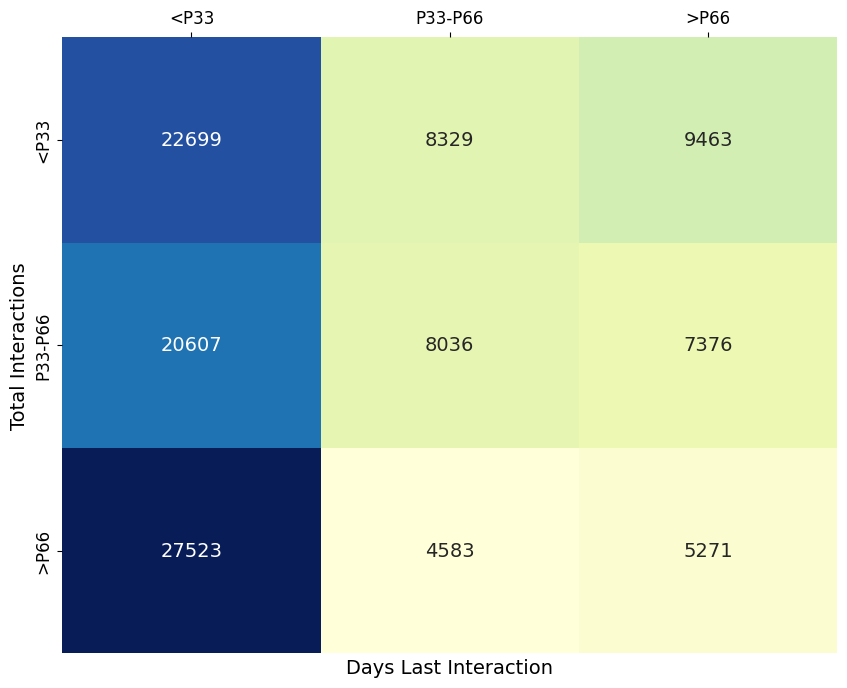

In [35]:
# Crear un mapa de calor con Seaborn
# Configurar la posición de las etiquetas en el eje X en la parte superior
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(contingency_table, annot=True, cmap="YlGnBu", fmt='g', cbar=False,  # Eliminar la leyenda de intensidad
                      xticklabels=['<P33', 'P33-P66', '>P66'], yticklabels=['<P33', 'P33-P66', '>P66'],
                      annot_kws={'size': 14})  # Aumentar el tamaño de la fuente para las anotaciones

heatmap.xaxis.tick_top()

# Aumentar el tamaño de la fuente en los ejes y las etiquetas
plt.xlabel('Days Last Interaction', fontsize=14)
plt.ylabel('Total Interactions', fontsize=14)

# Aumentar el tamaño de la fuente en las etiquetas del eje X e Y
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('../graph/matrix_engagement.png')
plt.show()

In [38]:
# Llama a la función con el nombre de tu archivo SQL
df_L1 = consulta_archivo('poker_tada')
# plot_percentiles(df_L1, 'Dias_interaccion')

poker_tada.sql
(68235, 3)
                                               td_id  ordenes      money
0  0001a1de3f8c90902ae9b1dd22e5c78ae974887d05f3d1...        1   15107.14
1               0001b68b-18d4-4a28-a7bd-d9ea6787c06d        4  161590.00


[1.0 2.0]


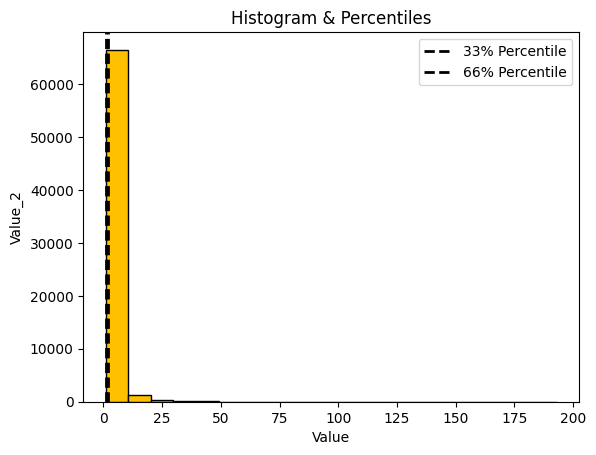

In [39]:
plot_percentiles(df_L1, 'ordenes')

[26900.       65082.320724]


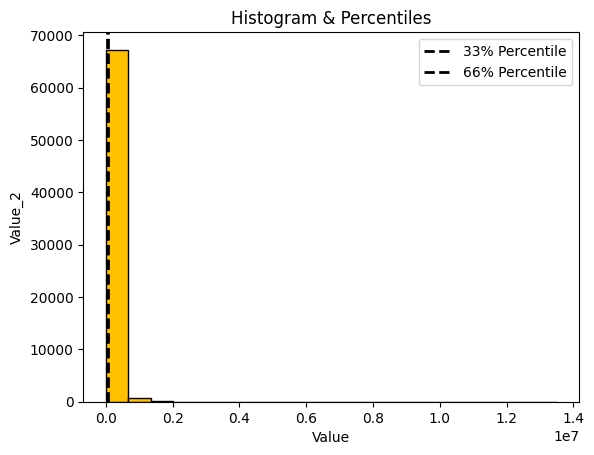

In [40]:
plot_percentiles(df_L1, 'money')

In [41]:
percentile_value_max = np.percentile(df_L1['money'], 99)
df = df_L1[(df_L1['money'] > 2000) & (df_L1['money'] < percentile_value_max)].copy()
df.shape    

(67473, 3)

In [42]:
df.head()

,td_id,ordenes,money
0,0001a1de3f8c90902ae9b1dd22e5c78ae974887d05f3d1...,1,15107.14
1,0001b68b-18d4-4a28-a7bd-d9ea6787c06d,4,161590.00
2,0001dd3376517611a308369481b301d55a727b54e41cd5...,4,139000.00
3,0001e864352ded6e1a7f47ce661f5b4b346711494e9687...,2,53700.00
4,0002b18c86c40a95f6a50154bf73a675c6465d02f3b1f5...,1,52100.00


In [43]:
percentile_value_max = np.percentile(df['ordenes'], 99)
df1 = df[df['ordenes'] < percentile_value_max].copy()
df1.shape

(66694, 3)

In [ ]:
# percentile_value_max = np.percentile(df['ordenes'], 99)
# df = df[(df['ordenes'] > 0) & (df['ordenes'] < percentile_value_max)].copy()
# df.shape

[26800. 63500.]


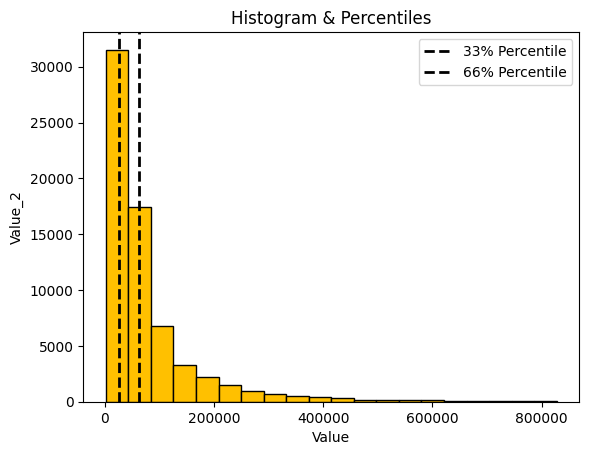

In [44]:
plot_percentiles(df1, 'money')

[1.0 2.0]


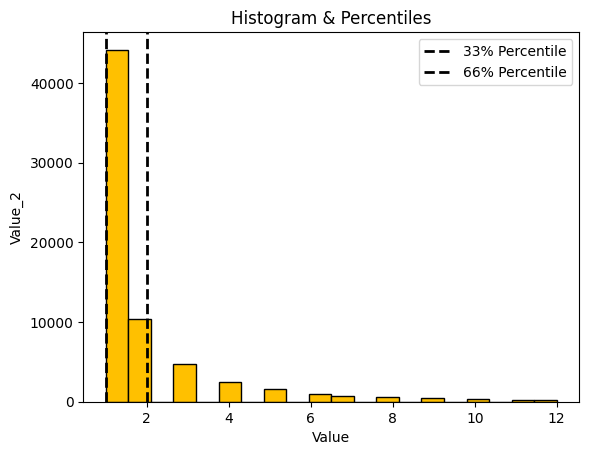

In [45]:
plot_percentiles(df1, 'ordenes')

In [ ]:
df1.ordenes.value_counts()

In [ ]:
# Calcular deciles para ambas variables
df1['corte_ordenes'] = pd.qcut(df1['ordenes'], q=3, labels=False, duplicates='drop')
df1['corte_money'] = pd.qcut(df1['money'], q=3, labels=False, duplicates='drop')
# Crear una tabla de contingencia (matriz de cruces)
contingency_table = pd.crosstab(df1['corte_ordenes'], df1['corte_money'])

# Imprimir la tabla de contingencia
print(contingency_table)

In [ ]:
contingency_table.head()

In [ ]:
contingency_table.to_csv('test.csv', index=False)

In [ ]:
# # Crear un mapa de calor con Seaborn
# plt.figure(figsize=(10, 8))
# heatmap = sns.heatmap(contingency_table, annot=True, cmap="YlGnBu", fmt='g', cbar_kws={'label': 'Frecuencia'},
#                       xticklabels=['0', '1', '2'], yticklabels=['0', '1', '2'], cbar=False)

# # Colocar las etiquetas del eje X en la parte superior
# heatmap.xaxis.tick_top()
# plt.xlabel('Terciles de Ordenes')
# plt.ylabel('Terciles de Dinero')
# plt.title('Mapa de Calor de la Tabla de Contingencia')
# plt.show()

In [ ]:
# Crear un mapa de calor con Seaborn
# Configurar la posición de las etiquetas en el eje X en la parte superior
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(contingency_table, annot=True, cmap="YlGnBu", fmt='g', cbar=False,  # Eliminar la leyenda de intensidad
                      xticklabels=['<P33', 'P33-P66', '>P66'], yticklabels=['<P33', 'P33-P66', '>P66'],
                      annot_kws={'size': 14})  # Aumentar el tamaño de la fuente para las anotaciones

heatmap.xaxis.tick_top()

# Aumentar el tamaño de la fuente en los ejes y las etiquetas
plt.xlabel('Total Orders', fontsize=14)
plt.ylabel('Orden Expenses', fontsize=14)

# Aumentar el tamaño de la fuente en las etiquetas del eje X e Y
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('../graph/matrix_engagement.png')
plt.show()